<a href="https://colab.research.google.com/github/Shashank251225/hotel-booking-analysis-1-/blob/main/Individual_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

### New Section

### **HOTEL BOOKING ANALYSIS**

TODO - talk about EDA 

TODO - talk about the dataset (what it contains , how it will be useful)
       


1.   Information about hotel bookings 
2.   can we useful in booking hotel rooms 



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# DATA PREPARATION AND CLEANING 

1. load the file using pandas 
2. look at some information about the data and columns
3. fix any missing or incorrect values




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/"

In [ ]:
df = pd.read_csv( path + "hotel_bookings.csv" )

In [ ]:
df.head().T

,0,1,2,3,4
hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel
is_canceled,0,0,0,0,0
lead_time,342,737,7,13,14
arrival_date_year,2015,2015,2015,2015,2015
arrival_date_month,July,July,July,July,July
arrival_date_week_number,27,27,27,27,27
arrival_date_day_of_month,1,1,1,1,1
stays_in_weekend_nights,0,0,0,0,0
stays_in_week_nights,0,0,1,1,2
adults,2,2,1,1,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
## Find the missing value, show the total null values for each column and sort it in descending order
df.isnull().sum().sort_values(ascending=False)[:10]

company                   112593
agent                      16340
country                      488
children                       4
reserved_room_type             0
assigned_room_type             0
booking_changes                0
deposit_type                   0
hotel                          0
previous_cancellations         0
dtype: int64

### We have 4 features with missing values.

### In the agent and the company column, we have id_number for each agent or company, so for all the missing values, we will just replace it with 0.

In [ ]:
## If no id for agent or company is null, just replace it with 0
df[['agent','company']] = df[['agent','company']].fillna(0.0)

Children column contains the count of children, so we will replace all the missing values with the rounded mean value.

And our country column contains country codes representing different countries. It is a categorical feature so I will also replace it with the mode value. The mode value is the value that appears more than any other value. So, in this case, I am replacing it with the country that appears the most often

In [ ]:
## For the missing values in the country column, replace it with mode (value that appears most often)
df['country'].fillna(df.country.mode().to_string(), inplace=True)


## for missing children value, replace it with rounded mean value
df['children'].fillna(round(df.children.mean()), inplace=True)

In [ ]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

We can see different data types for different columns.

There are some columns like children, company, and agent, that are float type but their values are only in integers.

So we will convert them to the integer type.

In [ ]:
## convert datatype of these columns from float to integer
df[['children', 'company', 'agent']] = df[['children', 'company', 'agent']].astype('int64')

# **Exploratory Data Analysis**
lets extract the information from our data and try to answer our questions

### 1. Which Hotel type has more yearly bookings?



Text(0.5, 1.0, 'yearly bookings')

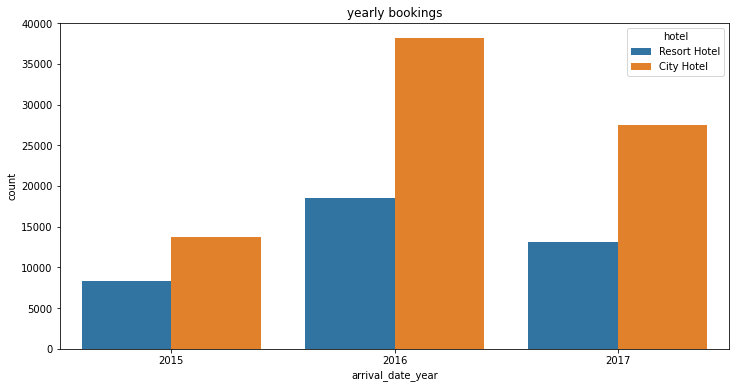

In [ ]:
plt.figure(figsize=(12,6)) 
sns.countplot (x= 'arrival_date_year', data= df, hue= 'hotel').set_title ('yearly bookings')

### Inference: Bookings across years is higher for city hotel compared to resort hotel.

### 2. From where the most guests are coming ?

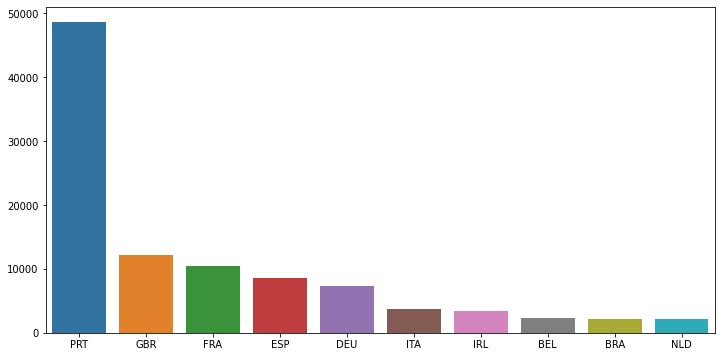

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot (y= list(df.country.value_counts().head (10)), x= list(df.country.value_counts().head(10).index))

### Inference : highest number of guests are from Portugal followed by Great Britain and France.

### 3. Which hotel type has more cancellations?

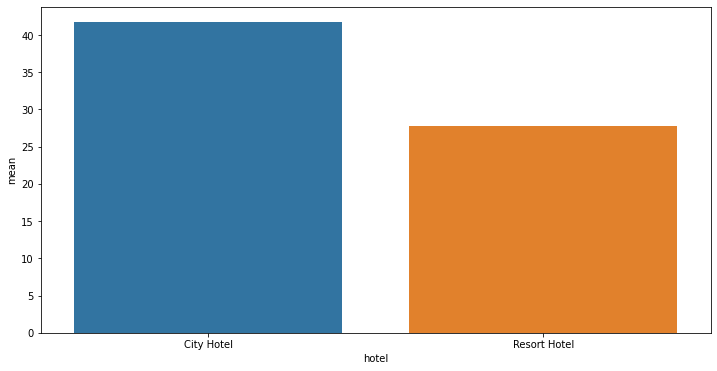

In [ ]:
plt.figure(figsize=(12,6))
a = df.groupby("hotel")['is_canceled'].describe()

sns.barplot(x=a.index, y=a["mean"] * 100)

### Inference : Around 40% bookings were cancelled in city hotel and 30% in resort hotel.

### 4. Which are the months of highest and least occupation?

Text(0.5, 1.0, 'yearly bookings')

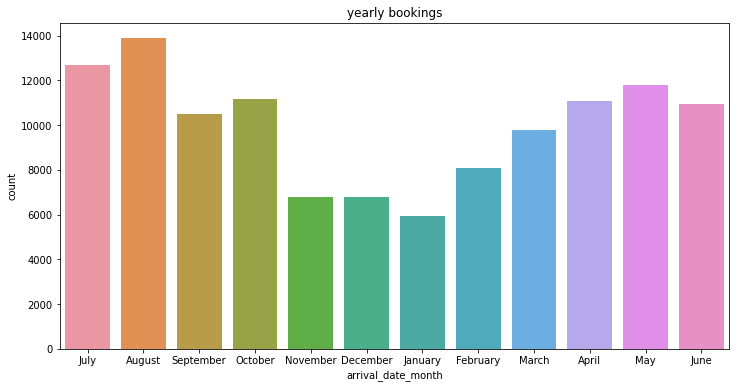

In [ ]:
plt.figure(figsize=(12,6))

sns.countplot (x= 'arrival_date_month', data= df).set_title ('yearly bookings')


### Inference : The month of highest occupation is august , the month of least occupation is january .

### 5. What is the monthwise Average Daily Rate (ADR)?


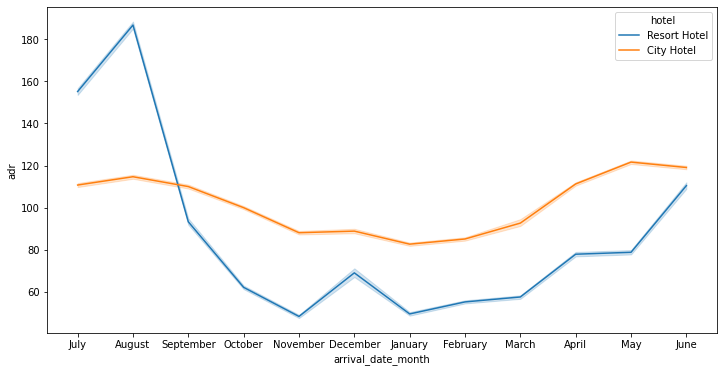

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x='arrival_date_month', y='adr', hue='hotel', data= df)
plt.show()

###Inference: For resort hotels, the average daily rate is more expensive during august, july and september.

### For city hotels, the average daily rate is more expensive during august, july, june and may.

### 6. What is the most popular meal package?

([<matplotlib.patches.Wedge at 0x7f1896352d90>,
 [Text(-0.8323489200839225, 0.7191628989562298, 'BB'),
  Text(0.5524963068325438, -0.9511823331708804, 'HB'),
  Text(1.0199901030372185, -0.4118497173801685, 'SC'),
  Text(1.09708977274818, -0.07996268211701422, 'Undefined'),
  Text(1.099757494115253, -0.023096626102945154, 'FB')])

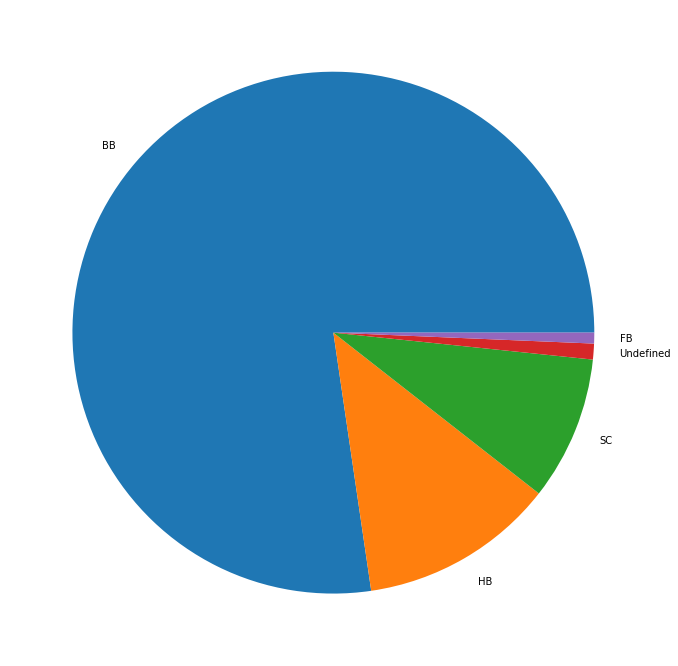

In [ ]:
df.meal.value_counts(normalize=True)
plt.figure(figsize=(12,12))
plt.pie(df.meal.value_counts() , labels = (df.meal.value_counts().keys()))




### Inference : BB is the most popular meal package.

### 7. Which is the most reserved room type?**bold text**

([<matplotlib.patches.Wedge at 0x7f189641f690>,
 [Text(-0.7447712944931664, 0.8095157311003743, 'A'),
  Text(0.4620945240647294, -0.9982327638528959, 'D'),
  Text(0.9930792652422807, -0.47306825400342817, 'E'),
  Text(1.0800599249178466, -0.2084959438129561, 'F'),
  Text(1.0982533740521032, -0.0619639119421252, 'G')])

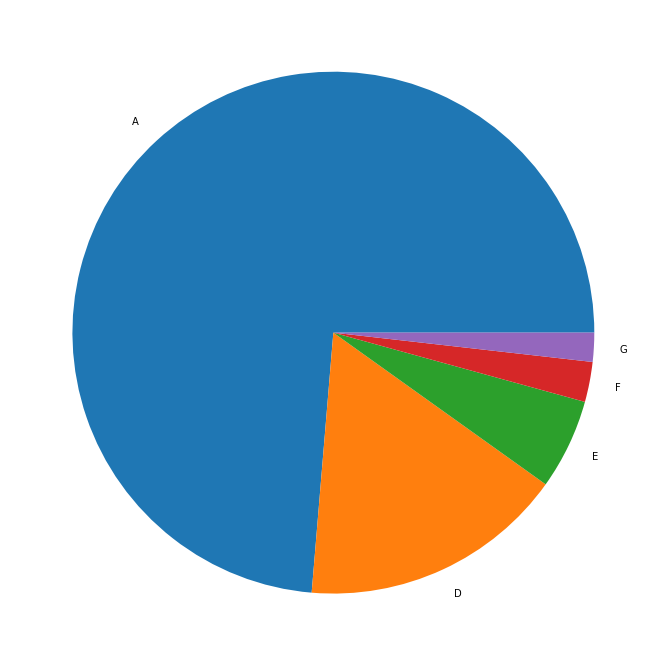

In [ ]:
df.reserved_room_type.value_counts(normalize=True)
plt.figure(figsize=(12,12))
plt.pie(df.reserved_room_type.value_counts().head(5), labels = (df.reserved_room_type.value_counts().head(5).keys()))

### Inference : The A room type is the most popular among the clients.

## 8.What is the most common customer type?

([<matplotlib.patches.Wedge at 0x7f1896331a50>,
 [Text(-0.7792590652236177, 0.7763731765503068, 'Transient'),
  Text(0.6786054633474156, -0.8657335762895185, 'Transient-Party'),
  Text(1.0895997419764234, -0.15090527586838032, 'Contract'),
  Text(1.099873215166035, -0.01670061556735508, 'Group')])

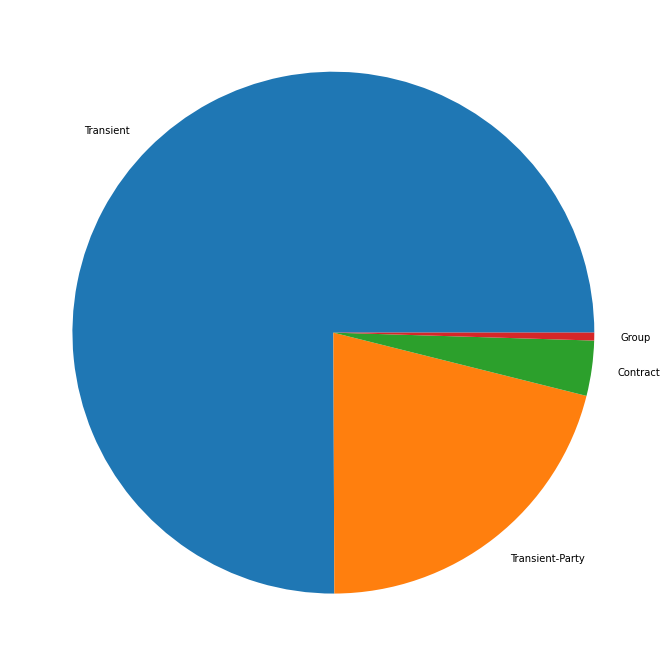

In [ ]:
df.customer_type.value_counts(normalize=True)
plt.figure(figsize=(12,12))
plt.pie(df.customer_type.value_counts(), labels = (df.customer_type.value_counts().keys()))

### Inference : Trasients are the most common customer type